# Incident + attack
- when and where attacks happen. Viz: interactive map, heatmap...
- what kind of attack? 
- why the attack happened? Successful/suicide?

This section aims to answer when and where attacks happen. We will also take a look into the types of attacks and the specific regions for those type of attacks.

## Filtering Dataset

In [ ]:
import pandas as pd
import numpy as np

# Transform the data from xlsx to csv
# Replace 'Sheet1' with the actual sheet name from the Excel filed
df = pd.read_excel('globalterrorismdb_0522dist.xlsx', sheet_name='Data')
df.to_csv('globalterrorismdb_0522dist.csv', index=False)

In [4]:
# Filter the data to include only the relevant columns for "Incident + Attack" section
df = df[['iyear', 'iday', 'imonth', 'country', 'country_txt', 'region', 'region_txt', 'city', 'latitude', 'longitude', 'success', 'suicide', 'attacktype1', 'attacktype1_txt']]
df.to_csv('filtered_data_globalterrorism.csv', index=False)

# Calendar plot (attacks each year)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


(<Figure size 900x6120 with 51 Axes>,
 array([<AxesSubplot:ylabel='1970'>, <AxesSubplot:ylabel='1971'>,
        <AxesSubplot:ylabel='1972'>, <AxesSubplot:ylabel='1973'>,
        <AxesSubplot:ylabel='1974'>, <AxesSubplot:ylabel='1975'>,
        <AxesSubplot:ylabel='1976'>, <AxesSubplot:ylabel='1977'>,
        <AxesSubplot:ylabel='1978'>, <AxesSubplot:ylabel='1979'>,
        <AxesSubplot:ylabel='1980'>, <AxesSubplot:ylabel='1981'>,
        <AxesSubplot:ylabel='1982'>, <AxesSubplot:ylabel='1983'>,
        <AxesSubplot:ylabel='1984'>, <AxesSubplot:ylabel='1985'>,
        <AxesSubplot:ylabel='1986'>, <AxesSubplot:ylabel='1987'>,
        <AxesSubplot:ylabel='1988'>, <AxesSubplot:ylabel='1989'>,
        <AxesSubplot:ylabel='1990'>, <AxesSubplot:ylabel='1991'>,
        <AxesSubplot:ylabel='1992'>, <AxesSubplot:ylabel='1994'>,
        <AxesSubplot:ylabel='1995'>, <AxesSubplot:ylabel='1996'>,
        <AxesSubplot:ylabel='1997'>, <AxesSubplot:ylabel='1998'>,
        <AxesSubplot:ylabel='1999'>, <

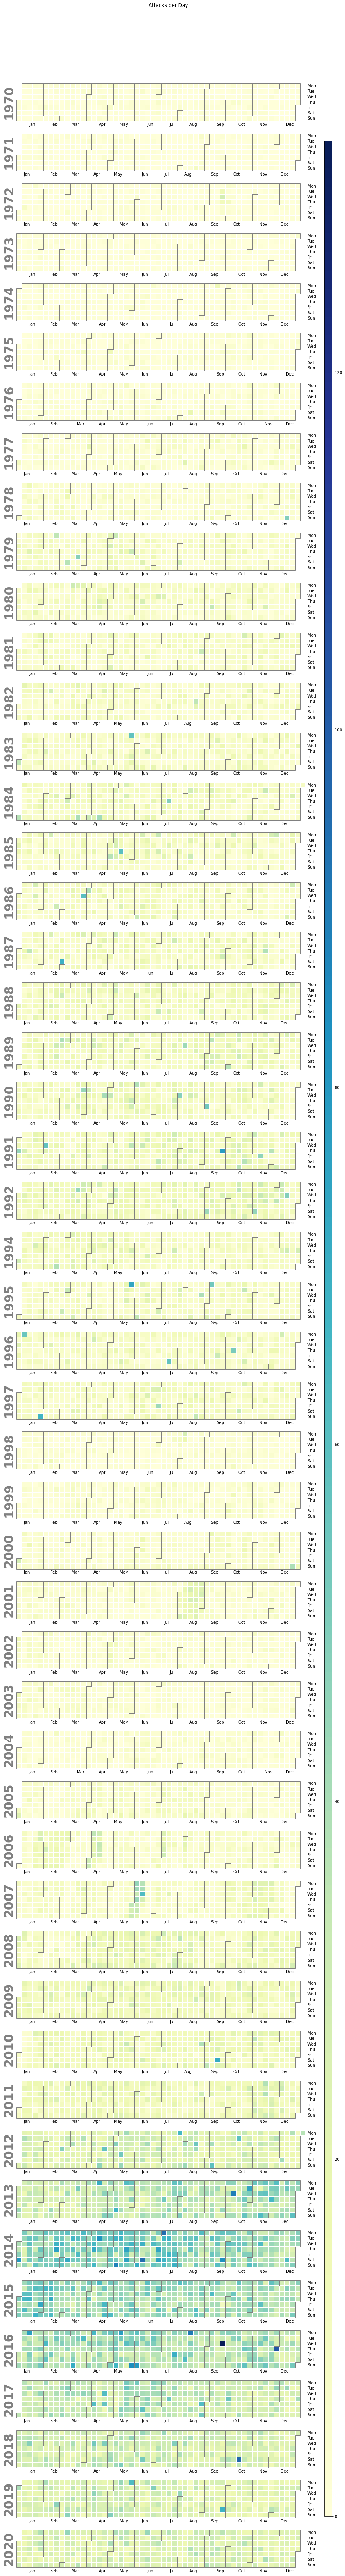

In [7]:
import matplotlib.pyplot as plt
import calplot

# Filter out rows where day = 0 (to exclude unknown days)
df = df[df['iday'] != 0]

# Create a 'date' column
df['date'] = pd.to_datetime(df[['iyear', 'imonth', 'iday']].rename(columns={'iyear': 'year', 'imonth': 'month', 'iday': 'day'}))

# Group by date and count the number of attacks per day
attacks_per_day = df['date'].value_counts().sort_index()

# Creat a pivot table with the counts of attacks per day
attacks_per_day_pivot = attacks_per_day.reset_index()
attacks_per_day_pivot.columns = ['Date','Attacks']

# Ensure the 'Date' column is set as the index
attacks_per_day_pivot.set_index('Date', inplace=True)

# Plot using calplot
calplot.calplot(attacks_per_day_pivot['Attacks'], suptitle='Attacks per Day', cmap='YlGnBu', colorbar=True)

# Calendar Visualization Explanation

This calendar visualization provides a clear, high-level view of the evolution in the frequency of terrorist attacks over time. In the early 1970s, the dataset shows relatively low daily attack counts, suggesting that terrorism was less frequent or less systematically recorded during that period. Moving into the 1980s, occasional spikes begin to appear, indicating an uptick in both the occurrence and visibility of attacks.

The trend remains fairly consistent throughout the 1990s, but in the months leading up to September 11, 2001, there's a noticeable increase in daily incidents. Interestingly, following the 9/11 attacks, there is a sharp drop in the frequency of attacks, which persists until around 2006–2007. This period of reduced activity may reflect increased global counterterrorism efforts or shifts in reporting.

Beginning in 2012, the number of attacks rises dramatically, peaking in 2014—a year that aligns with the height of ISIS activity and unrest in the Middle East. After 2017, the frequency of attacks begins to decline again, suggesting a potential de-escalation or success in counterterrorism efforts in some regions.

Overall, the calendar format effectively highlights temporal patterns and significant turning points in global terrorism trends.

# Heat map with time series
World map of attacks per year

In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMapWithTime

# Load the data
df = pd.read_csv('filtered_data_globalterrorism.csv')

# Drop rows with missing coordinates
df = df.dropna(subset=['latitude', 'longitude', 'iyear'])

# Group data by year
years = sorted(df['iyear'].unique())
heat_data = []

for year in years:
    yearly_data = df[df['iyear'] == year]
    locations = yearly_data[['latitude', 'longitude']].values.tolist()
    heat_data.append(locations)

# Create a base map
map_hooray = folium.Map(location=[20, 0], zoom_start=2)

# Create and add the time-enabled heatmap
heatmap = HeatMapWithTime(    heat_data,
    index=years,
    auto_play=True,
    max_opacity=0.3,
    radius=2,
    scale_radius=True
)

heatmap.add_to(map_hooray)

# Display the map
map_hooray

# Save the map to an HTML file for the webiste
#map_hooray.save('heatmap_globalterrorism.html')


# Heatmap Analyses

This heatmap provides a dynamic visualization of the geographic distribution of terrorist attacks over time. One of the most striking patterns is the apparent underreporting or lack of data in the first two decades of the dataset—particularly in regions like Central Africa. Given that this region later emerges as one of the most active in terms of attacks, the early absence likely reflects data limitations rather than a true lack of activity.

Over the years, the intensity and location of attack concentrations fluctuate, but several regions consistently appear as hotspots. These include parts of Europe, the Middle East, a broad belt stretching across Central Africa (from west to east), Southeast Africa, the northern edge of South America, and a swath of South Asia spanning from Afghanistan to Malaysia—including the Philippines.

In addition to these persistent hotspots, the heatmap reveals smaller, time-bound concentrations of activity corresponding to localized conflicts. Examples include South Korea before the 2000s, Northern Ireland during the Troubles, Spain during the height of ETA activity, and Chile during the Pinochet regime. These regional spikes align with well-documented historical and political events, highlighting the value of temporal heatmapping in uncovering context-specific patterns in global terrorism trends.

# Atatck types

<ipython-input-22-05660ae5c8f4>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(attack_type_counts.index, rotation=45, ha='right')


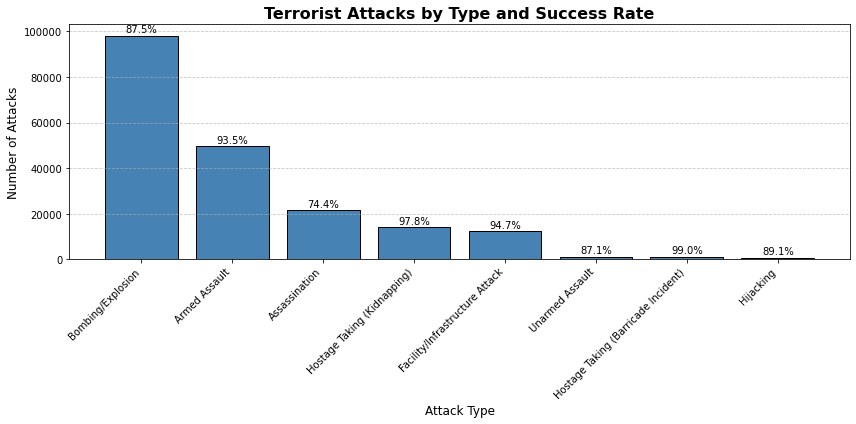

In [22]:
import matplotlib.pyplot as plt

# Count of attacks per type (excluding 'Unknown')
attack_type_counts = df['attacktype1_txt'].value_counts()
attack_type_counts = attack_type_counts[attack_type_counts.index != 'Unknown']
attack_type_counts = attack_type_counts.sort_values(ascending=False)

# Calculate success percentage for each attack type
success_counts = df[df['success'] == 1]['attacktype1_txt'].value_counts()
success_percentage = (success_counts / attack_type_counts) * 100

# Plot settings
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(attack_type_counts.index, attack_type_counts.values, color='steelblue', edgecolor='black')

# Add success % labels on top of each bar
for bar, pct in zip(bars, success_percentage[attack_type_counts.index]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 500, f"{pct:.1f}%", 
            ha='center', va='bottom', fontsize=10, color='black')

# Titles and labels
ax.set_title('Terrorist Attacks by Type and Success Rate', fontsize=16, fontweight='bold')
ax.set_ylabel('Number of Attacks', fontsize=12)
ax.set_xlabel('Attack Type', fontsize=12)
ax.set_xticklabels(attack_type_counts.index, rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


# Analysis
Bombing/Explosion is the most common type of attack. This is not surprising given the effectivity of a bomb against humans and infrastructure plus it can be done remotely. 

# Regions involved

<ipython-input-33-76ca0a5b46ee>:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.04, 0.05, 0.88, 0.95])


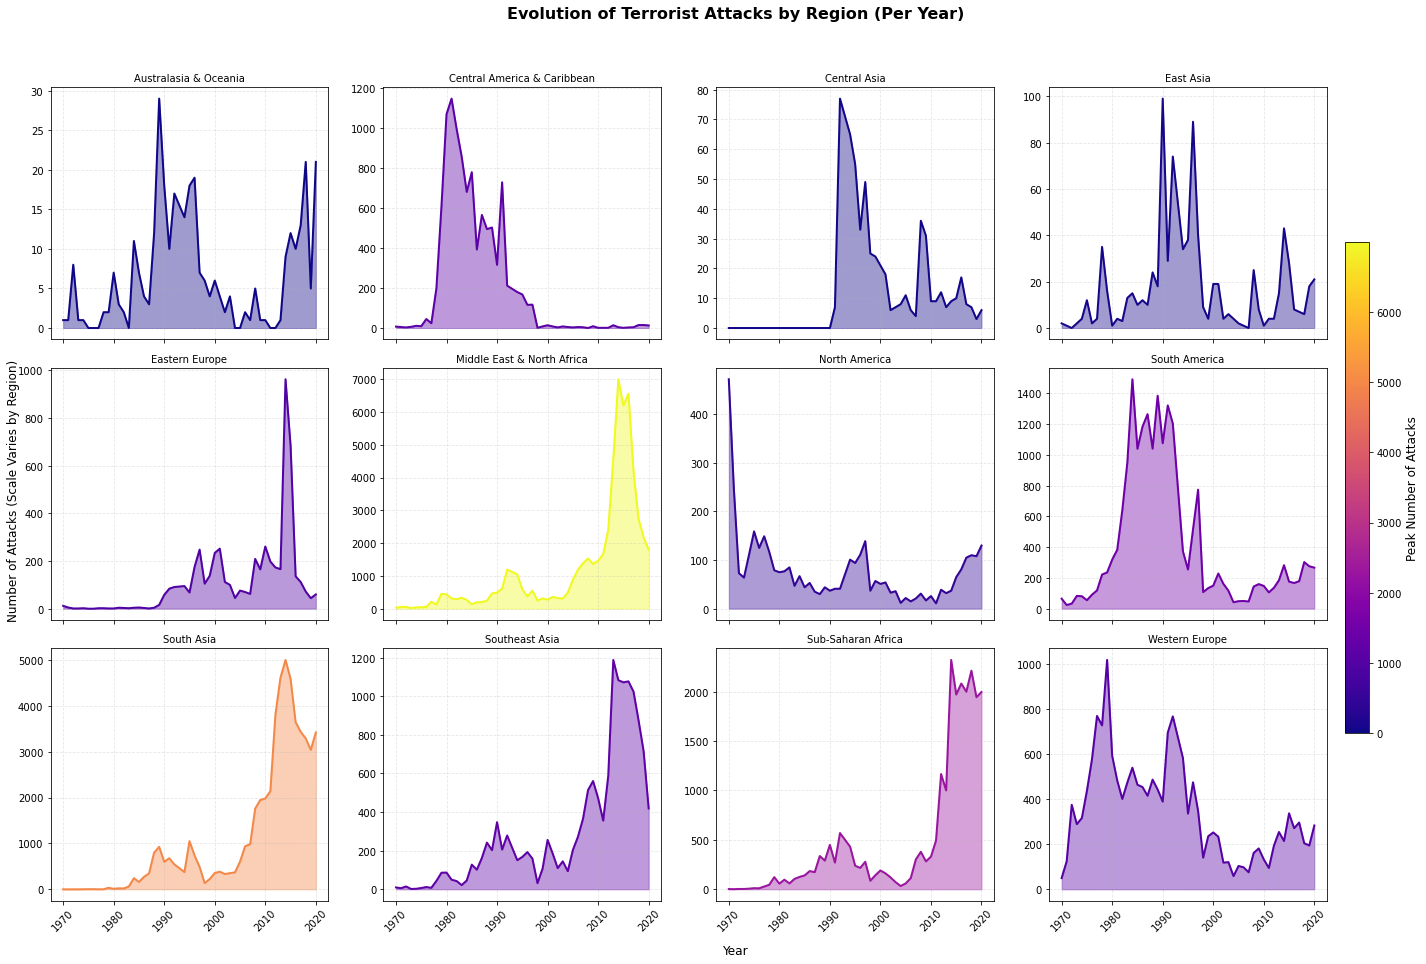

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# Prepare the data
df = df.dropna(subset=['iyear', 'region_txt'])
attacks_by_region = df.groupby(['iyear', 'region_txt']).size().unstack(fill_value=0)

# Plot configuration
num_regions = len(attacks_by_region.columns)
cols = 4
rows = (num_regions + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(22, 14), sharex=True)
axes = axes.flatten()

# Global colormap normalization
global_max = attacks_by_region.values.max()
norm = colors.Normalize(vmin=0, vmax=global_max)
cmap = cm.get_cmap('plasma')

# Plot each subplot
for i, region in enumerate(attacks_by_region.columns):
    region_data = attacks_by_region[region]
    peak_val = region_data.max()
    color = cmap(norm(peak_val))  # consistent color scale

    # Fill and line
    axes[i].fill_between(region_data.index, region_data.values, color=color, alpha=0.4)
    axes[i].plot(region_data.index, region_data.values, color=color, linewidth=2)

    axes[i].set_title(region, fontsize=10)
    axes[i].tick_params(axis='x', labelrotation=45)
    axes[i].grid(True, linestyle='--', alpha=0.3)

# Turn off unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add main title and axis labels
fig.suptitle('Evolution of Terrorist Attacks by Region (Per Year)', fontsize=16, fontweight='bold')
fig.text(0.5, 0.04, 'Year', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Number of Attacks (Scale Varies by Region)', va='center', rotation='vertical', fontsize=12)

# Add colorbar clearly outside
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes.tolist(), orientation='vertical', fraction=0.02, pad=0.15)
cbar.set_label('Peak Number of Attacks', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0.04, 0.05, 0.88, 0.95])
plt.show()



# Analysis
This visualization captures both the temporal and regional heterogeneity of terrorism globally. It reveals how terrorism has shifted in focus over time, with some regions becoming more volatile in recent decades. The peak year trends also suggest links to major geopolitical shifts, civil conflicts, and insurgent activities.

1. Middle East & North Africa stands out with the highest peak of attacks, particularly during the early 2010s. The intense yellow tone in this plot highlights that the region experienced the most concentrated period of violence globally, peaking around 2014–2015.

2. South Asia and Sub-Saharan Africa also show high activity, with steep increases starting in the late 2000s and sharp peaks afterward. South Asia's curve is steep and sustained, indicating prolonged conflict intensity.

3. Southeast Asia, Central Asia, and South America exhibit mid-level peaks (orange to pink shading), suggesting regional but less globally dominant spikes in violence, often tied to specific insurgencies or political unrest.

4. Western Europe and North America show more episodic patterns — brief but sharp spikes in attacks (e.g., IRA in the UK or domestic terrorism in the US) but overall lower sustained intensity compared to conflict-heavy regions.

5. Eastern Europe and East Asia show relatively subdued activity, both in terms of frequency and intensity, reflected by darker tones and flatter curves.

6. Central America & Caribbean, despite having moments of activity, never reach the same peaks as other regions, indicating more localized or less frequent terrorist incidents.